# **INTRODUCTION**:

# **THE METRIC**:

# **THE BEST (RESPONSIBLE) NEIGHBORHOOD**:

### NON-TRAFFIC VIOLATION DATA:
Below is a dictionary of neighborhoods and the number of non-traffic violations in those neighborhoods.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("violations.tsv", sep = "\t")

In [3]:
ref_data = pd.DataFrame({'NEIGHBORHOOD': data['NEIGHBORHOOD']})
clean_data = ref_data[ref_data['NEIGHBORHOOD'].notna()]
clean_data[clean_data['NEIGHBORHOOD'] != "Outside City"]
location_counts = dict()

for index, row in clean_data.iterrows():
    loc = row['NEIGHBORHOOD']
    if loc in location_counts:
        location_counts[loc] += 1
    else:
        location_counts[loc] = 1

location_counts

{'North Oakland': 199,
 'Allegheny Center': 157,
 'Homewood South': 227,
 'Upper Lawrenceville': 35,
 'Golden Triangle/Civic Arena': 42,
 'Lower Lawrenceville': 31,
 'South Side Flats': 3453,
 'East Liberty': 258,
 'Point Breeze': 51,
 'Central Oakland': 665,
 'Brookline': 310,
 'Beechview': 153,
 'Bluff': 147,
 'Hazelwood': 285,
 'Overbrook': 58,
 'Knoxville': 247,
 'Glen Hazel': 33,
 'Carrick': 456,
 'Northview Heights': 70,
 'Strip District': 101,
 'Friendship': 17,
 'Arlington': 102,
 'Lincoln-Lemington-Belmar': 155,
 'East Allegheny': 360,
 'Squirrel Hill North': 173,
 'East Hills': 155,
 'Shadyside': 304,
 'Crawford-Roberts': 102,
 'Marshall-Shadeland': 129,
 'North Shore': 577,
 'Elliott': 134,
 'Homewood West': 58,
 'Chateau': 66,
 'Greenfield': 155,
 'Allentown': 191,
 'South Oakland': 132,
 'South Side Slopes': 188,
 'Bloomfield': 149,
 'Spring Hill-City View': 55,
 'California-Kirkbride': 35,
 'West Oakland': 63,
 'Larimer': 160,
 'Mount Washington': 329,
 'South Shore': 52,

In [4]:
violation_counts = clean_data['NEIGHBORHOOD'].value_counts().reset_index()
violation_counts.columns = ['Neighborhood', 'Violation Count']

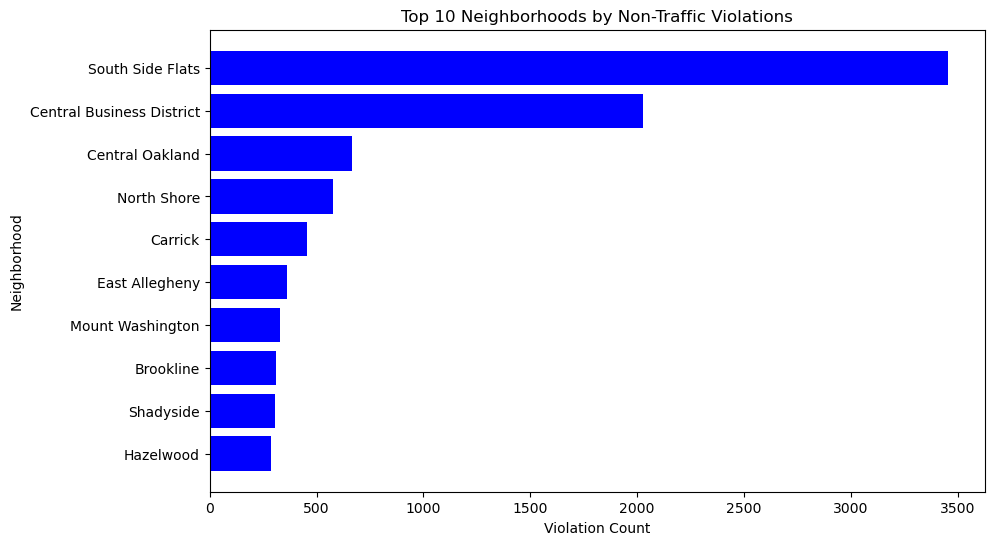

In [5]:
top_10 = violation_counts.head(10)

plt.figure(figsize=(10,6))
plt.barh(top_10['Neighborhood'], top_10['Violation Count'], color='blue')
plt.gca().invert_yaxis()
plt.title("Top 10 Neighborhoods by Non-Traffic Violations")
plt.xlabel("Violation Count")
plt.ylabel("Neighborhood")
plt.show()

- Southside Flats, Central Business Distric, and Central Oakland have the highest number of non-traffic violations

### ARRESTS DATA:

In [9]:
### IMPORT REQUIRED MODULES:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
### READ IN THE FILE:

df = pd.read_csv("arrest_data.csv")

In [11]:
### CLEAN DATA:

#Gets rid of any columns with blank data
df_clean = df[df['INCIDENTNEIGHBORHOOD'].notna()]
#Since we are looking at neighborhoods within the city, we will omit anything outside of the Greater Pittsburgh Region. 
df_clean = df_clean[df_clean['INCIDENTNEIGHBORHOOD'] != "Outside City"]
df_clean.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,6,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699


In [12]:
### BASIC ANALYSIS: 

arrest_counts = df_clean['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrest_counts.columns = ['Neighborhood', 'Arrest Count']

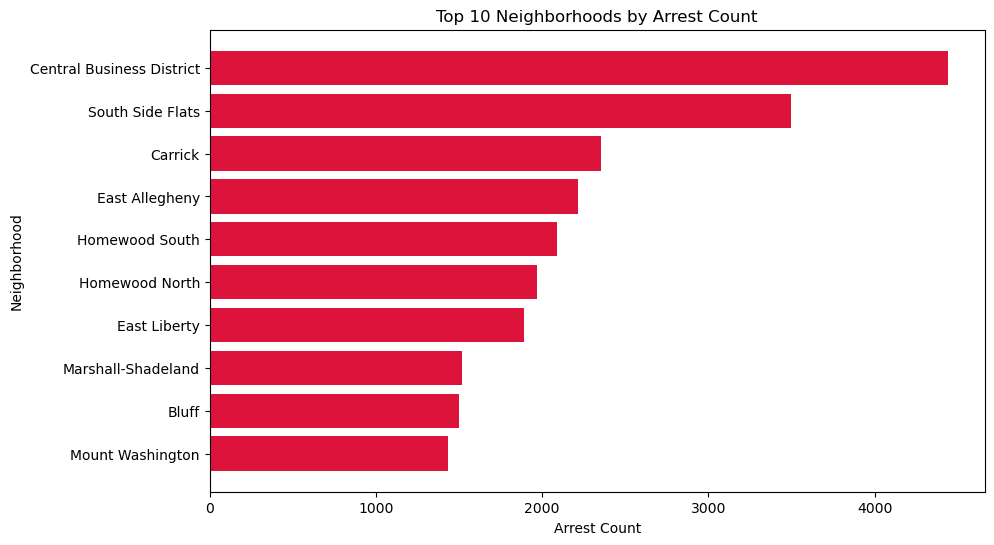

In [13]:
### MOST ARRESTS:

top_10 = arrest_counts.head(10)

#PLOT
plt.figure(figsize=(10,6))
plt.barh(top_10['Neighborhood'], top_10['Arrest Count'], color='crimson')
plt.gca().invert_yaxis()
plt.title("Top 10 Neighborhoods by Arrest Count")
plt.xlabel("Arrest Count")
plt.ylabel("Neighborhood")
plt.show()


- Observation: CENTRAL BUSINESS DISTRICT MOST ARRESTS

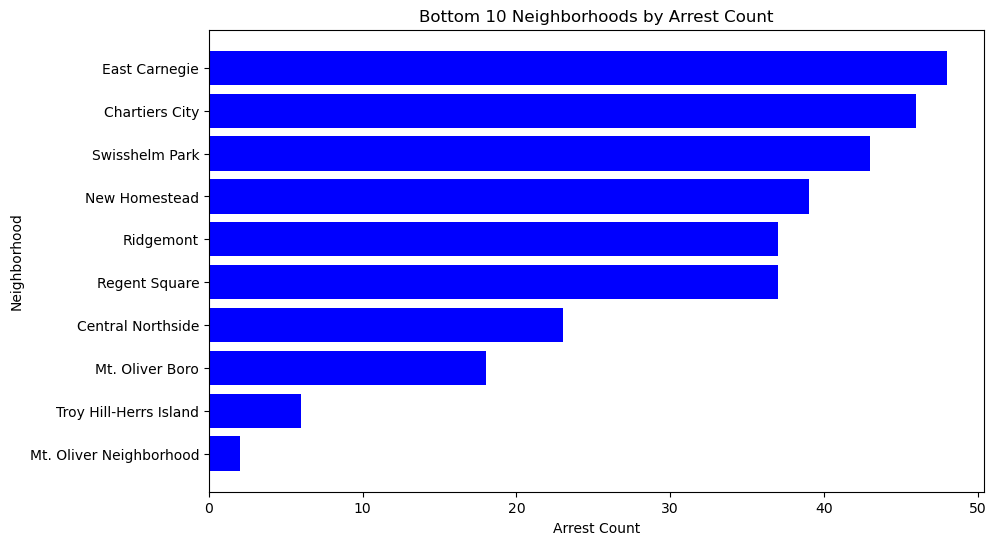

In [15]:
### LEAST ARRESTS:

least_10 = arrest_counts.tail(10)

#PLOT
plt.figure(figsize=(10,6))
plt.barh(least_10['Neighborhood'], least_10['Arrest Count'], color='blue')
plt.gca().invert_yaxis()
plt.title("Bottom 10 Neighborhoods by Arrest Count")
plt.xlabel("Arrest Count")
plt.ylabel("Neighborhood")
plt.show()


- Observation: MT. OLIVER NEIGHBORHOOD LEAST ARRESTS

In [18]:
### ADVANCED ANALYSIS:

df_clean['OFFENSES'] = df_clean['OFFENSES'].fillna('').str.lower()
df_clean['OFFENSES'] = df_clean['OFFENSES'].str.lower()

In [19]:
# Assign severity to offenses (in consideration with the other offenses from the list)

def classify_severity(offense):
    if 'aggravated assault' in offense or 'strangulation' in offense or 'terroristic threats' in offense:
        return 5
    elif 'simple assault' in offense or 'bench warrant' in offense or 'failure to appear' in offense:
        return 4
    elif 'dui' in offense or 'retail theft' in offense or 'theft' in offense or 'receiving stolen property' in offense:
        return 3
    elif 'controlled substance' in offense or 'marijuana' in offense or 'paraphernalia' in offense or 'contempt' in offense:
        return 2
    else:
        return 1

df_clean['Severity'] = df_clean['OFFENSES'].apply(classify_severity)


In [20]:
# Find the average severity by neighborhood
severity_by_neighborhood = df_clean.groupby('INCIDENTNEIGHBORHOOD')['Severity'].mean().reset_index()
severity_by_neighborhood.columns = ['Neighborhood', 'Average Severity']

# Count arrests by neighborhood
arrest_counts = df_clean['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrest_counts.columns = ['Neighborhood', 'Arrest Count']

# Merge severity and arrest count data
combined_df = pd.merge(arrest_counts, severity_by_neighborhood, on='Neighborhood')

# Filter to Central Business District and Mt. Oliver
filtered_df_severity = combined_df[combined_df['Neighborhood'].isin(['Central Business District', 'Mt. Oliver Neighborhood'])]

filtered_df_severity

,Neighborhood,Arrest Count,Average Severity
0,Central Business District,4440,2.925
96,Mt. Oliver Neighborhood,2,2.500


In [22]:
# Check which for incidents with a severity of 4 or more (more severe crimes)

severe_df = df_clean[df_clean['Severity'] >= 4]
severe_percent = severe_df.groupby('INCIDENTNEIGHBORHOOD').size() / df_clean.groupby('INCIDENTNEIGHBORHOOD').size()
severe_percent = severe_percent.dropna().sort_values(ascending=False)

filtered_neighborhoods = severe_percent.loc[
    ['Central Business District', 'Mt. Oliver Neighborhood']
]
print(filtered_neighborhoods)

INCIDENTNEIGHBORHOOD
Central Business District    0.426577
Mt. Oliver Neighborhood      0.500000
dtype: float64


### TAX & PROPERTIES DATA:

# **CONCLUSION**: